<a href="https://colab.research.google.com/github/Manavshah1703/Customer_Churn_Analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel(r'/content/Customer_Churn_Dataset.xlsx')
print(data)

    CustomerID  Gender  Age  Tenure  Products Purchased  Monthly Charges  \
0     CUST0001    Male   21      63                   3           142.88   
1     CUST0002    Male   34      20                   5            85.71   
2     CUST0003  Female   42      58                   4           145.67   
3     CUST0004    Male   38      69                   5            47.97   
4     CUST0005    Male   31      62                   2            65.88   
..         ...     ...  ...     ...                 ...              ...   
495   CUST0496    Male   36      60                   4            21.23   
496   CUST0497  Female   64      71                   3            42.28   
497   CUST0498    Male   37       6                   4            84.98   
498   CUST0499  Female   55      58                   1            76.41   
499   CUST0500    Male   55      25                   1           121.97   

     Total Charges Churn  
0          9001.44   Yes  
1          1714.20   Yes  
2     

In [ ]:
# Check missing values
print(df.isnull().sum())

df = df.dropna()

CustomerID            0
Gender                0
Age                   0
Tenure                0
Products Purchased    0
Monthly Charges       0
Total Charges         0
Churn                 0
dtype: int64


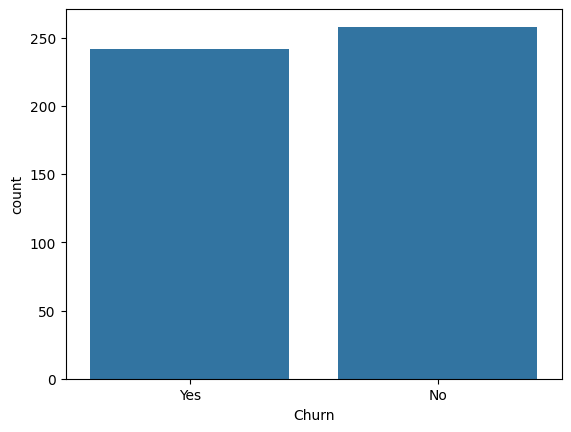

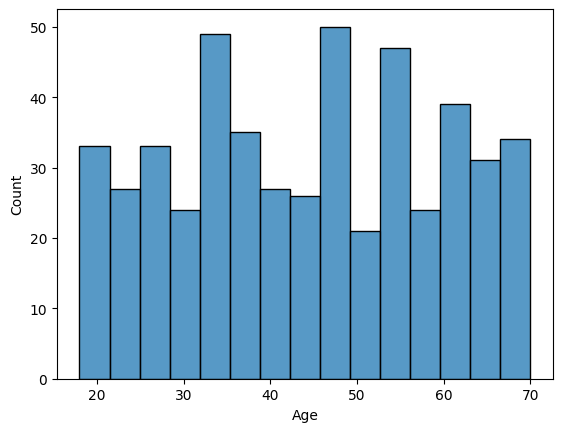

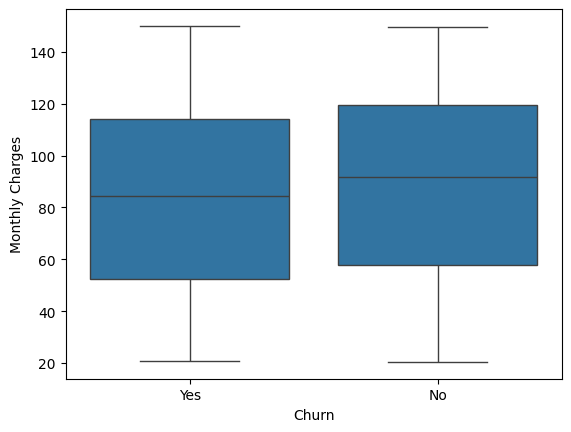

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of churn vs non-churn
sns.countplot(x='Churn', data=df)
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=15)
plt.show()

# Monthly charges by churn
sns.boxplot(x='Churn', y='Monthly Charges', data=df)
plt.show()


In [ ]:
# Convert Gender and Churn to numeric
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})
print(df)

    CustomerID  Gender  Age  Tenure  Products Purchased  Monthly Charges  \
0     CUST0001     NaN   21      63                   3           142.88   
1     CUST0002     NaN   34      20                   5            85.71   
2     CUST0003     NaN   42      58                   4           145.67   
3     CUST0004     NaN   38      69                   5            47.97   
4     CUST0005     NaN   31      62                   2            65.88   
..         ...     ...  ...     ...                 ...              ...   
495   CUST0496     NaN   36      60                   4            21.23   
496   CUST0497     NaN   64      71                   3            42.28   
497   CUST0498     NaN   37       6                   4            84.98   
498   CUST0499     NaN   55      58                   1            76.41   
499   CUST0500     NaN   55      25                   1           121.97   

     Total Charges  Churn  
0          9001.44    NaN  
1          1714.20    NaN  
2  

In [ ]:
from sklearn.model_selection import train_test_split

# Features
X = df[['Gender', 'Age', 'Tenure', 'Products Purchased', 'Monthly Charges', 'Total Charges']]
y = df['Churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(400, 6) (100, 6)
(400,) (100,)


----- LOGISTIC REGRESSION -----
Accuracy: 0.51
Confusion Matrix:
 [[34 15]
 [34 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.69      0.58        49
           1       0.53      0.33      0.41        51

    accuracy                           0.51       100
   macro avg       0.52      0.51      0.50       100
weighted avg       0.52      0.51      0.49       100

----- RANDOM FOREST -----
Accuracy: 0.46
Confusion Matrix:
 [[29 20]
 [34 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.59      0.52        49
           1       0.46      0.33      0.39        51

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.46      0.45       100



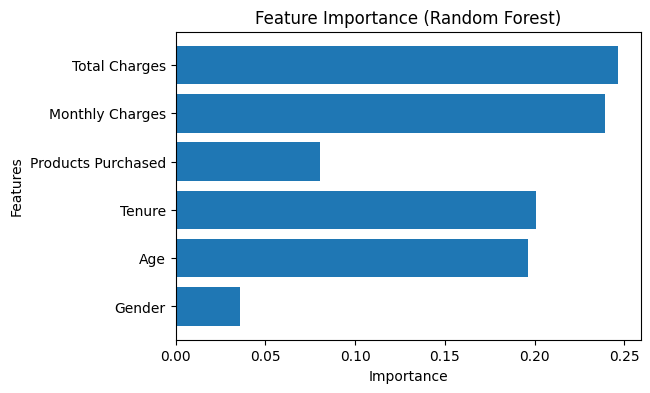

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

df = pd.read_excel("Customer_Churn_Dataset.xlsx")

# Convert categorical columns
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

# Ensure numeric columns
numeric_cols = ['Age', 'Tenure', 'Products Purchased', 'Monthly Charges', 'Total Charges']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df = df.dropna()  # drop any missing rows

#  FEATURES & TARGET
X = df[['Gender', 'Age', 'Tenure', 'Products Purchased', 'Monthly Charges', 'Total Charges']]
y = df['Churn']

# SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LOGISTIC REGRESSION

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("----- LOGISTIC REGRESSION -----")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


# RANDOM FOREST

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("----- RANDOM FOREST -----")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



# FEATURE IMPORTANCE (Random Forest)

import matplotlib.pyplot as plt
import numpy as np

importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
plt.barh(features, importance)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()















In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.46


In [ ]:
import numpy as np

importance = rf_model.feature_importances_
for i,v in enumerate(importance):
    print(f"{X.columns[i]}: {v:.2f}")

Gender: 0.04
Age: 0.20
Tenure: 0.20
Products Purchased: 0.08
Monthly Charges: 0.24
Total Charges: 0.25
